#### 1-  Gere um gráfico que mostre a quantidade de avaliações de cada usuário. Ordene pela quantidade de avaliações.

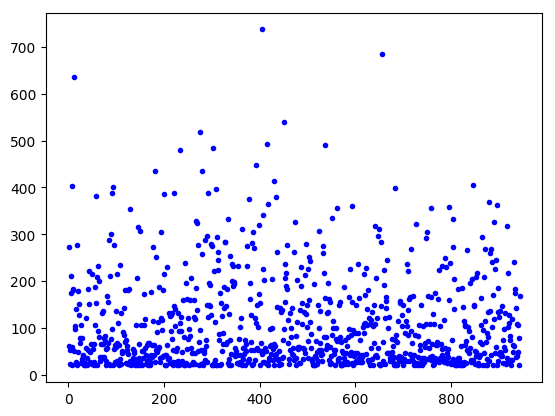

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0f54841590>

In [15]:
using PyPlot

function plot_user()
  file = open("ml-100k/u.data")

  user = Dict()

  for v in map(x -> split(x, "\t"), readlines(file))
    user[v[1]] = haskey(user, v[1]) ? user[v[1]] + 1 : 1
  end

  v = sort(collect(zip(values(user), keys(user))))

  figure(1)
  plot(map(x -> x[2], v), map(x -> x[1], v), color="blue", "r.")
end
plot_user()

### 2 - Gere o histograma das notas, ou seja, quantos usuários deram nota um, quantos deram nota dois e assim por adiante

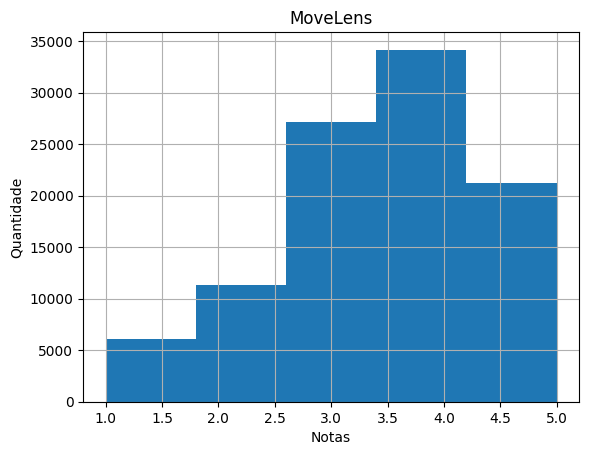

PyObject <matplotlib.text.Text object at 0x7f0f54a05d10>

In [14]:
using PyPlot

function count_notes()
  file = open("ml-100k/u.data")

  v = map(x -> parse(Int, split(x, "\t")[3]), readlines(file))

  fig = figure("pyplot_histogram")
  ax = axes()
  h = plt[:hist](v, 5)

  grid("on")
  ylabel("Quantidade")
  xlabel("Notas")
  title("MoveLens")
end

count_notes()

### 3 - Divida a base aleatoriamente em 80% e 20%. O primeiro será chamado de base de treinamento e a segunda base de teste. Calcule a m´edia das notas de cada usu´ario na base de treinamento

In [16]:
function ex()
  file = open("ml-100k/u.data")

  data = readlines(file)
  shu = shuffle(data)

  _max = convert(Int, size(data)[1] * 0.8)

  training = shu[1:_max]
  test = shu[_max + 1:end]

  average = Dict()
  quantAv = Dict()
  globalAv = mean(map(x -> float(split(x, "\t")[3]), training))

  for vet in map(x -> split(x, "\t"), training)
    if haskey(average, vet[1])
      average[vet[1]] += float(vet[3])
      quantAv[vet[1]] += 1.0
    else
      average[vet[1]] = float(vet[3])
      quantAv[vet[1]] = 1.0
    end
  end

  prediction = Dict()
  mae = 0.0

  for vet in map(x -> split(x, "\t"), test)
    if haskey(average, vet[1])
      prediction[(vet[1], vet[2])] = average[vet[1]] / quantAv[vet[1]]
    else
      prediction[(vet[1], vet[2])] = globalAv
    end
    mae += abs(prediction[(vet[1], vet[2])] - float(vet[3]))
  end
  mae = mae / size(test)[1]
  println(mae)
end

main()

0.8342095739030477


### 4 - Faça exatamente igual ao exercício anterior, mas utilize a média do item. Compare e discuta o erro das duas formas de previsão

In [17]:
function exe4()
  file = open("ml-100k/u.data")
  data = readlines(file)
  shu = shuffle(data)
  _max = convert(Int, size(data)[1] * 0.8)
  training = shu[1:_max]
  test = shu[_max + 1:end]
  average = Dict()
  quantAv = Dict()
  globalAv = mean(map(x -> float(split(x, "\t")[3]), training))

  for vet in map(x -> split(x, "\t"), training)
    if haskey(average, vet[2])
      average[vet[2]] += float(vet[3])
      quantAv[vet[2]] += 1.0
    else
      average[vet[2]] = float(vet[3])
      quantAv[vet[2]] = 1.0
    end
  end

  prediction = Dict()
  mae = 0.0

  for vet in map(x -> split(x, "\t"), test)
    if haskey(average, vet[2])
      prediction[(vet[1], vet[2])] = average[vet[2]] / quantAv[vet[2]]
    else
      prediction[(vet[1], vet[2])] = globalAv
    end
    mae += abs(prediction[(vet[1], vet[2])] - float(vet[3]))
  end
  mae = mae / size(test)[1]
  println(mae)
end

exe4()

0.8169875083337523
